## 지도학습 vs 비지도학습
- 지도학습 : 종속변수가 존재하는 것
  + 독립변수(=설명변수) : 아버지의 키, 공부시간
  + 종속변수(=반응변수) : 자녀의 키, 성적
- 비지도학습 : 종속변수가 존재하지 않는 것
- 두개 모두 예측
  + 지도학습 : 수치를 예측 / 범주를 예측(남/여)를 예측 : 예시 동물의 종 분류 / 암진단 / 코로나 진단 / 신용대출 거절

## 머신러닝 / 딥러닝의 흐름
- 1단계 : 데이터를 불러오기
  + 내장데이터
  + 대회데이터
  + 실무) DB에서 데이터 끌어오기
  + 실무) (API) 크롤링 데이터를 끌어오기
- 2단계 : 데이터를 가공
- 전체 공정이 100이라고 하면, 1-2단계 전체 공정의 70%
- 3단계 : 데이터셋 분리
  + 훈련데이터 / 테스트데이터 분리
  + 통계적인 기법을 활용하면서 분리
- 4단계 : 머신러닝 파이프라인 구축 (자동화)
- 5단계 : 모델 생성
- 6단계 : 하이퍼 파라미터 튜닝
- 7단계 : 최종모델 만듬
- 8단계 : 모형 예측
- 9단계 : 모형 성능 결과 시각화

## 설정

In [1]:
# matplotlib 최신 버전 업데이트
!pip install matplotlib -U

# 설치 후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 시각화 옵션 설정


In [2]:
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')

## 데이터 불러오기
- seaborn 라이브러리에 있는 펭귄 데이터를 불러온다.

In [4]:
pen_df = sns.load_dataset('penguins')
pen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 데이터 가공
- 결측치, NULL값 제거하기
- 인덱스 번호 재정렬


In [5]:
pen_df = pen_df.dropna().reset_index(drop=True)
pen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


- 펭귄의 종을 분류
  + 부리의 길이, 두께, 펭귄의 팔길이, 몸무게
  + 팔길이 181, 몸무게 3750

In [6]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
pen_df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

## 데이터셋 분리
- 훈련데이터와 검증데이터로 분리하는 코드를 작성한다.
- 데이터셋 분리, 층화추출 방식으로 분리한다.
  + 데이터의 비율에 맞도록 분류
  + 한국인 100명 / 일본인 50명
  + 70:30 = 35명 : 15명
  + 25명 25명 (X)
  + 50명 25명 (X)
- scikit-learn : https://scikit-learn.org/stable/

In [8]:
from sklearn.model_selection import train_test_split

# 종속변수
y = pen_df['body_mass_g']

# 독립변수
X = pen_df.drop('body_mass_g', axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify=X[['species', 'island', 'sex']])

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((266, 6), (67, 6), (266,), (67,))

## 머신러닝 파이프라인 구축
- 키워드 : Feature Engineering
  + 머신러닝 알고리즘에 적확한(accurate) 데이터를 입력
  + 문자데이터가 있으면 수치로 변환
  + 수치 데이터 변환

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

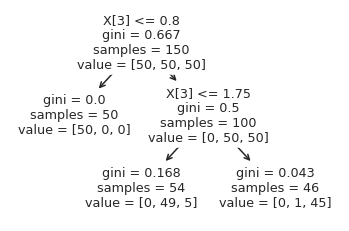

In [35]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [21]:
def self_intro(**data):
  print("\nData Type:", type(data))

  for key, value in data.items():
    print(f'{key}, {value}')

self_intro(firstname = 'evan', age = 10)
self_intro(firstname = '민', lastname = 'park', country = '한국')
self_intro(song = 'After Like')


Data Type: <class 'dict'>
firstname, evan
age, 10

Data Type: <class 'dict'>
firstname, 민
lastname, park
country, 한국

Data Type: <class 'dict'>
song, After Like


### 원핫인코딩
- OneHot Encoding
- Ordinal Encoding
- Label Encoding

- 문자열의 특징(통계 관점)
- 명목척도, 서열척도
  + 명목척도 : 서열을 측정할 수 없는 문자 데이터
    - 예) 한국인, 중국인, 일본인
    - 예) 시도
  + 서열척도 : 서열을 측정할 수 있는 문자 데이터
    - 예) 수능 1등급, 상품 등

In [9]:
# 문자 데이터를 수치로 변환
from sklearn.preprocessing import OneHotEncoder

# 수치데이터의 단위를 표준화(0 ~ 1)
from sklearn.preprocessing import StandardScaler

# 파이프라인 구축을 위한 주요 함수
# 수치 컬럼, 문자열 컬럼 구분
from sklearn.compose import ColumnTransformer

# 파이프라인
from sklearn.pipeline import Pipeline

# 머신러닝 알고리즘
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


def get_model(method = 'rf',
              cat_features = ['species','island','sex'],
              num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
              **kwargs):
  
  # 문자 데이터를 one-hot 인코딩에 적용
  cat_transformer = OneHotEncoder()

  # 숫자 데이터를 표준화 적용
  num_transformer = StandardScaler()

  # 각 데이터별 전처리 적용
  preprocessor = ColumnTransformer([('cat',cat_transformer, cat_features),
                                    ('num',num_transformer, num_features)])
  
  # 전처리 후 머신러닝 알고리즘 적용
  if method =='rf':
    ml = ('ml',RandomForestRegressor(**kwargs))
  elif method == 'lgbm':
    ml = ('ml',LGBMRegressor(**kwargs))
  elif method == 'xgb':
    ml = ('ml',XGBRegressor(**kwargs))
  else:
    print("알고리즘 없음")

  # 파이프라인 연결
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),ml])

  return pipeline

## 모델 생성
- RandomForest 알고리즘 불러와서 모델 생성


In [13]:
from sklearn import set_config
set_config(display = 'diagram')

In [16]:
model = get_model(method = 'xgb', random_state=0)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('ml', XGBRegressor())])

## 하이퍼 파라미터 튜닝
- Grid Search
- Random Search
- 최신기법 : https://optuna.org/


In [28]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# parameter distribution
params = {"ml__n_estimators": stats.randint(100, 300),   # [100, 200, 300]
          "ml__max_depth": stats.randint(3, 10),         # [3, 5, 10],
          "ml__min_samples_leaf": stats.randint(1, 10),  # [1, 3, 5, 7, 10]
          "ml__max_features": stats.uniform(0, 1),       # ["auto", "sqrt", "log2"]
          }

model = get_model(method = 'lgbm', random_state=0)
rscv = RandomizedSearchCV(model, 
                          param_distributions=params, 
                          n_iter = 30,
                          scoring = 'r2', refit = 'r2'
                          )

In [29]:
# 모델 학습
rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['species',
                                                                                'island',
                                                                                'sex']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['bill_length_mm',
                                                                                'bill_depth_mm',
                                                                                'flipper_length_mm'])])),
                                             ('ml',
                                              LGBMRegressor(random_state=0))]),
                   n_iter=30,
                   param_distributions={'ml__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf9090ca30>,
                                        'ml__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf9090cc70>,
                                        'ml__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf90a00370>,
                                        'ml__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf90a00310>},
                   refit='r2', scoring='r2')

In [30]:
import pandas as pd
pd.DataFrame.from_dict(rscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ml__max_depth,param_ml__max_features,param_ml__min_samples_leaf,param_ml__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048053,0.010991,0.006111,0.000153,9,0.192193,6,271,"{'ml__max_depth': 9, 'ml__max_features': 0.192...",0.791563,0.856921,0.849746,0.816007,0.770795,0.817006,0.033012,29
1,0.030969,0.001441,0.005791,0.000183,5,0.889478,2,179,"{'ml__max_depth': 5, 'ml__max_features': 0.889...",0.808150,0.861809,0.858409,0.835199,0.774944,0.827702,0.032644,18
2,0.033516,0.001981,0.007080,0.001052,6,0.949243,3,186,"{'ml__max_depth': 6, 'ml__max_features': 0.949...",0.805176,0.860023,0.852961,0.830748,0.772828,0.824347,0.032107,23
3,0.031791,0.002599,0.006318,0.001058,3,0.557999,5,250,"{'ml__max_depth': 3, 'ml__max_features': 0.557...",0.806582,0.862626,0.865082,0.844997,0.776058,0.831069,0.034562,8
4,0.022084,0.000893,0.005463,0.000035,3,0.256398,9,140,"{'ml__max_depth': 3, 'ml__max_features': 0.256...",0.826961,0.862549,0.870299,0.854503,0.774893,0.837841,0.034706,2
5,0.041656,0.001906,0.006574,0.000642,9,0.125803,8,260,"{'ml__max_depth': 9, 'ml__max_features': 0.125...",0.791789,0.857466,0.848794,0.816874,0.772397,0.817464,0.032472,28
6,0.031743,0.003463,0.006394,0.000929,6,0.059912,5,156,"{'ml__max_depth': 6, 'ml__max_features': 0.059...",0.812241,0.861789,0.856190,0.837821,0.771180,0.827844,0.033195,16
7,0.030117,0.000600,0.006142,0.000424,9,0.180968,8,158,"{'ml__max_depth': 9, 'ml__max_features': 0.180...",0.807988,0.862094,0.856285,0.834260,0.776076,0.827341,0.031925,19
8,0.023843,0.002605,0.005774,0.000636,8,0.881714,6,100,"{'ml__max_depth': 8, 'ml__max_features': 0.881...",0.822320,0.861619,0.859845,0.846009,0.765865,0.831132,0.035532,7
9,0.023747,0.001508,0.005995,0.000327,3,0.779465,1,143,"{'ml__max_depth': 3, 'ml__max_features': 0.779...",0.825654,0.862691,0.870105,0.854409,0.773842,0.837340,0.035146,4


## 모형 예측
- 주어진 하이퍼 파라미터 튜닝이 적용된 모델을 활용하여 예측을 해보자.

In [32]:
y_pred_train = rscv.predict(X_train)
y_pred_val = rscv.predict(X_val)

y_pred_train[:3], y_pred_val[:3]

(array([3507.35201915, 4704.738651  , 3518.17147756]),
 array([3722.04719284, 3519.2763703 , 3420.92645669]))

## 모형 성능 평가

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

c_train = "g"
c_val = "m"

def get_parity(y_train, y_val, y_pred_train, y_pred_val):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5.5), constrained_layout=True, sharex=True, sharey=True)
    for ax, y_true, y_pred, c, title in zip(axs, [y_train, y_val], [y_pred_train, y_pred_val], [c_train, c_val], ["train", "valid"]):
        ax.scatter(y_true, y_pred, c=c)
        ax.set_xlabel("true", color="gray", labelpad=12)
        if ax == axs[0]:
            ax.set_ylabel("prediction", color="gray", labelpad=12)
        ax.set_title(title, color="gray", pad=12)

        r2 = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)

        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        limmin = min(xmin, ymin)
        limmax = max(xmax, ymax)
        ax.plot([limmin, limmax], [limmin, limmax], c="k", alpha=0.5)
        ax.set_xlim(limmin, limmax)
        ax.set_ylim(limmin, limmax)

        ax.text(0.95, 0.05, f"R2 = {r2:.3f}\nRMSE = {rmse:.3f}", ha="right", transform=ax.transAxes, fontsize=16)
    return fig, r2

- 예측된 모형 결괏값을 가져와서 시각화로 보여주기

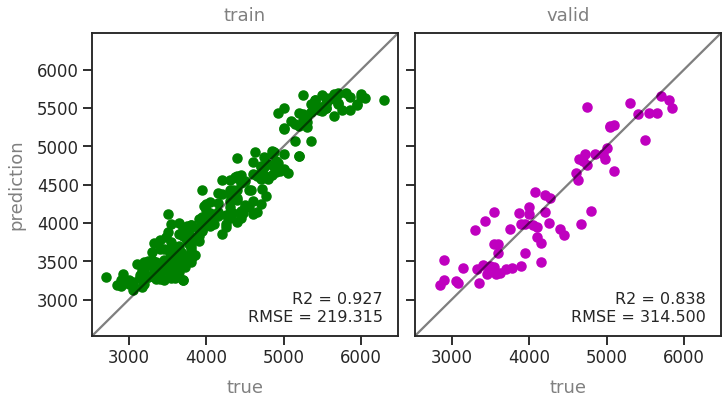

In [34]:
fig, r2_default = get_parity(y_train, y_val, y_pred_train, y_pred_val)

## 모형개발 팁
- 1단계 : 베이스라인 코드
- 2단계 : 여러모형 비교
- 3단계 : 파생변수 (논리적인 방식으로)
- 4단계 : 1~3단계 무한반복